In [1]:
# Importing relevant libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the .csv file and creating a data frame 
df_data = pd.read_csv("Salesstore.csv", error_bad_lines=False, sep = "\t")
df_data.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [3]:
# Finding the size of the dataset
print(f"No. of Rows = {df_data.shape[0]}" +"\n"+f"No. of Columns = {df_data.shape[1]}")

No. of Rows = 730
No. of Columns = 13


In [4]:
# Identifying all the columns in the dataset
df_data.columns

Index(['Order_ID', 'Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode',
       'Profit', 'Customer_Name', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Name',
       'Product_Container'],
      dtype='object')

# IDENTIFYING THE POTENTIAL FEATURES:
In the given dataset, following observations have been drawn-

> **TARGET VARIABLE** - Product_Container
Wherein we want to decide the size of the box which is to be used for a particular order, on the basis of it's features.


> Rest of the variable are the potential features.

> **Unique Record Identification Fields** - Customer-Name and Order_ID

> These features don't describe the data modle, rather are used for identifying each data entry, hence they must be removed from the dataset.












In [17]:
#Finding the Unique Record Identification Fields 
OrderID_len = len(df_data['Order_ID'].unique())
Customer_name_len = len(df_data['Customer_Name'].unique())
Dataset_len = df_data.shape[0]
print(f"Order_ID length ={OrderID_len} " +"\n"+ f"Customer Name Length = {Customer_name_len}"+"\n"+f"Total Data set length= {Dataset_len}")

Order_ID length =571 
Customer Name Length = 173
Total Data set length= 730


In [21]:
# Deleting the Unique Record Identification Fields form the dataset
df_ID = df_data['Order_ID']
df_name = df_data['Customer_Name']
df_data = df_data.drop(columns='Order_ID')
df_data = df_data.drop(columns='Customer_Name')
# Uodated Dataset
df_data.columns

Index(['Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode', 'Profit',
       'Region', 'Customer_Segment', 'Product_Category',
       'Product_Sub-Category', 'Product_Name', 'Product_Container'],
      dtype='object')

# **EXPLORATORY DATA ANALYSIS:**

In [22]:
# First five data entries
df_data.head()

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,High,21,2781.82,Express Air,-695.26,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,High,35,3389.93,Express Air,737.94,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,Not Specified,7,2039.56,Express Air,-329.49,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,Low,6,905.94,Express Air,-4.19,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,Medium,24,1168.15,Express Air,-743.96,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


# ***UNIVARIATE DATA PLOTTING***

In [23]:
# Various Satistical Properties of the numerical categories
df_data.describe()

,Order_Quantity,Sales,Profit
count,730.000000,730.000000,730.000000
mean,24.857534,1502.777653,207.479233
std,14.182970,2893.936648,878.631028
min,1.000000,8.600000,-4437.910000
25%,13.000000,171.098375,-77.132500
50%,25.000000,438.700000,0.035000
75%,37.000000,1480.855000,180.000000
max,50.000000,27663.920000,8417.570000


**Finding the Continuous and Categorical features**

Continuous Data

In [26]:
# CONTINUOUS DATA
num_cols = df_data._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(df_data[i].unique())) > int(df_data.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)

['Order_ID', 'Order_Quantity', 'Sales', 'Profit']


Categorical Data 

In [27]:
cat_cols = list(set(df_data.columns) - set(cont_cols))
cat_cols

['Customer_Segment',
 'Product_Name',
 'Customer_Name',
 'Product_Container',
 'Product_Category',
 'Ship_Mode',
 'Order_Priority',
 'Product_Sub-Category',
 'Region']

**BARGRAPHS OF ALL CATEGORICAL COLUMNS:**


> The features Product_Container, Product_Sub-Category, Product_Name have been neglected.


> **INFERENCES:**


1.   Priority of orders have been distributed in 5 categories, which have almost equal distributions in each. 
2.   Regular Air Shipment is more prominent than Express Air shipment.
3.   Majority of orders are from Corporate and consumer Segment, and the rest are home offices and small businesses. 
4.   Amongst product categories, Office Supplies, Furniture and Technology, Office supplies are in majority.







In [39]:
# Function to draw Histograms
def histograms_plot(dataframe, features):
  # Creating plot
  a = dataframe[features]
  fig = plt.figure(figsize =(15, 5))     
  plt.hist(a, color= 'Green')  
  plt.title(f"{features} Histogram")  
  # show plot
  plt.show()
 


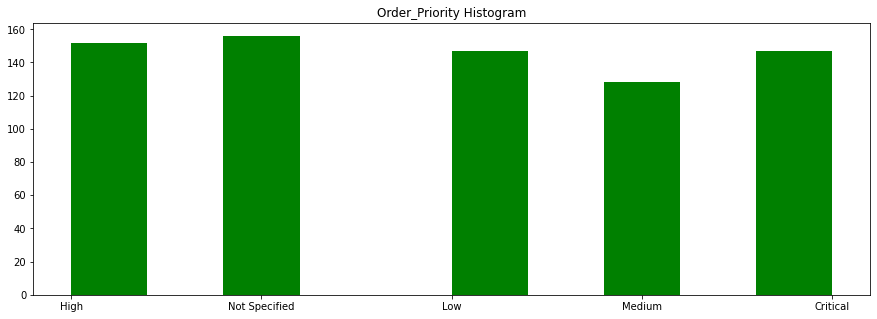

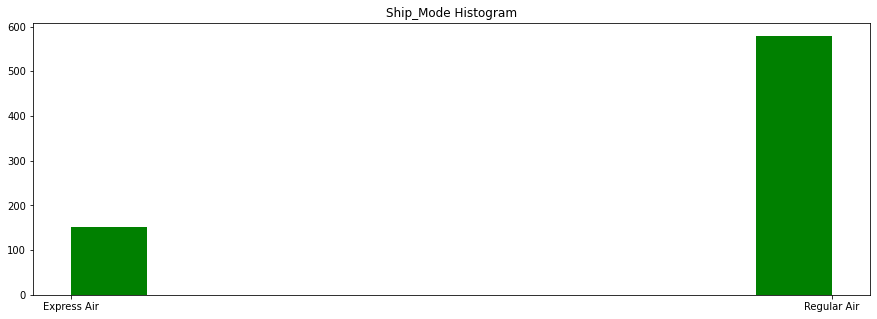

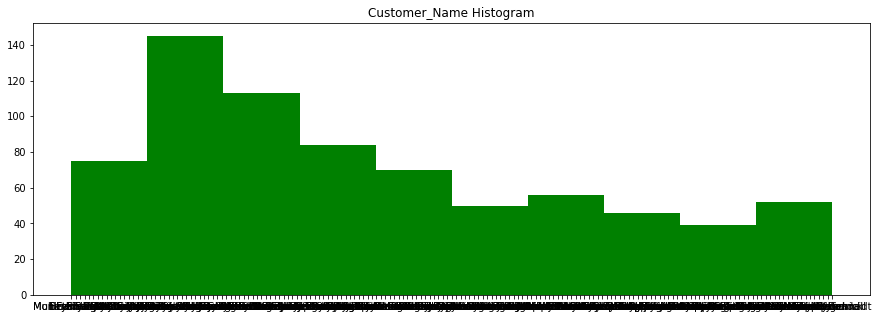

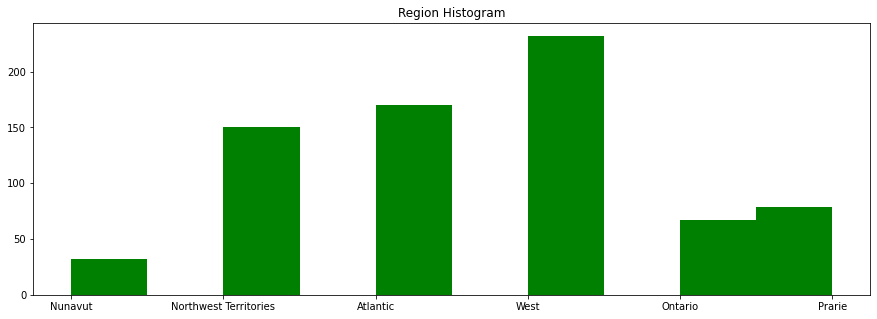

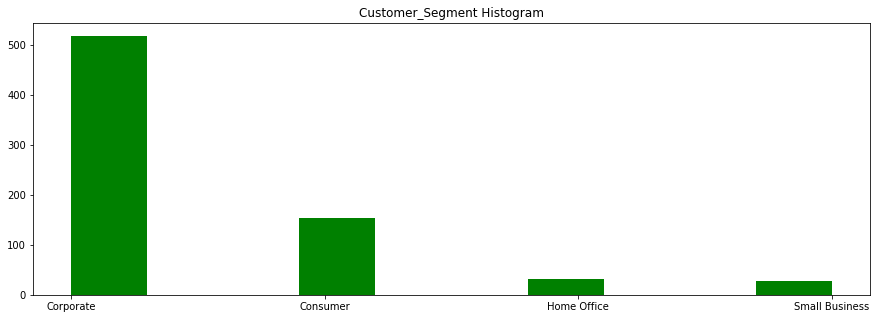

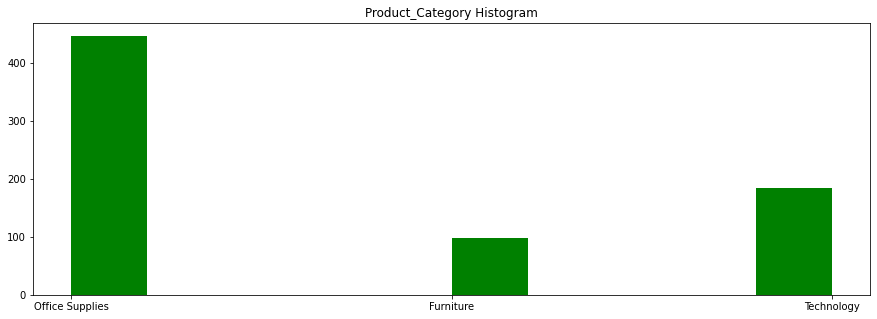

In [40]:
# Studying the Histograms of all categorical Features:
for i in df_data.columns:
  if i in cat_cols:
    if i!='Product_Container' and i!='Product_Sub-Category' and i!= 'Product_Name':
      histograms_plot(df_data, i)  
    


**BOX PLOTS OF ALL NUMERICAL COLUMNS:**

> *INFERENCES-*




1.   The Order_Quantity feature has almost no Outliers.
2.   The 'Sales' features has many outliers on the right hand side.Hence, the meadian is left-shifted
3. The 'Profit' feature has outliers to the left and right.Hence, the median is left shifted.






In [56]:
# Function to draw Line Plots
def Line_plot(dataframe, features):
  # Creating plot
  a = dataframe[features]
  fig = plt.figure(figsize =(5, 3))     
  sns.set_theme(style="whitegrid")
  ax = sns.boxplot(x=a) 
  plt.title(f"{features} Box Plot")  
  # show plot
  plt.show()

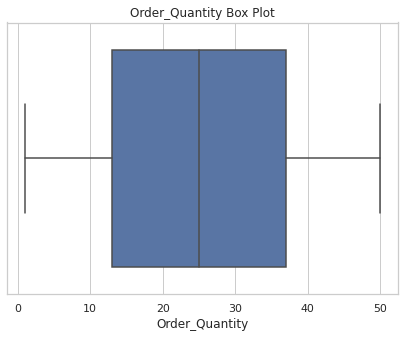

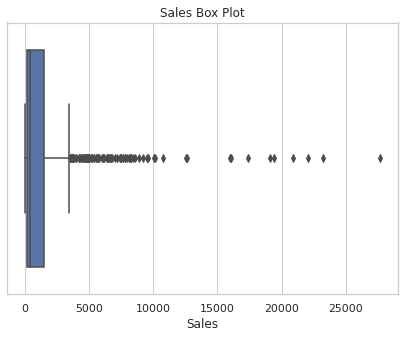

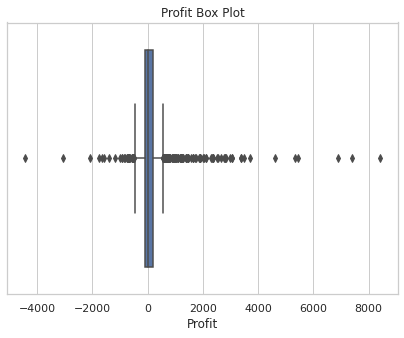

In [59]:
# Calling the Line_plot function for every numerical column in the  dataset
for i in df_data.columns:
  if i in cont_cols:
    Line_plot(df_data, i)

# ***BIVARIATE DATA PLOTS:***

**SCATTER PLOT**


> INFERENCES-
In the scatter plot drawn between the 'Sales' and the 'Product Quantity' and hue 'Product Category', the following inferences can be drawn:

1.   One can observe that the Technology-appliances are the most expensive, followed by Furniture and then, office supplies respectively.
2.   This way, even when the quantity of office supplies is much more than Technology appliances, the cost is comparatively less, in most cases.




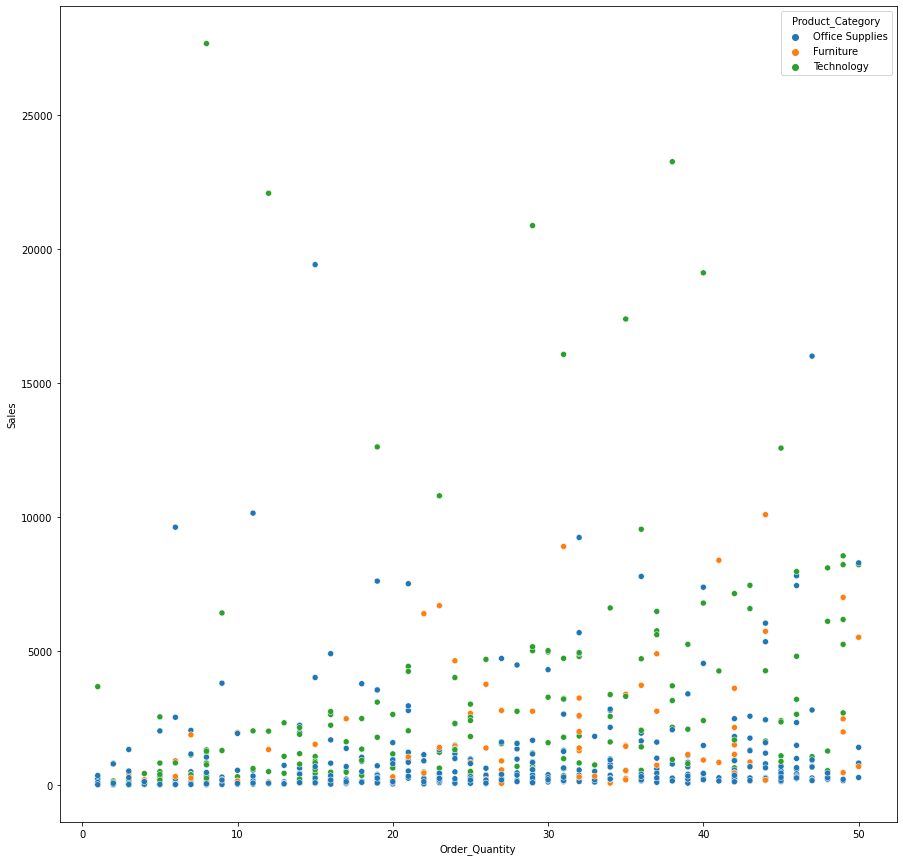

In [16]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data= df_data, x= 'Order_Quantity', y ='Sales', hue='Product_Category')


### FACET GRID:
With the aid of FACET GRIDS, we plot multiple scatter plots with columns as the different 'Product Containers'. 
Each plot has 'Order Quantity' and 'Sales' along the X-axis and Y-axis, respectively. 
*INFERENCES-*

1.   Most small boxes are used for Office Supplies and furniture, and the sales also remain on the lower side.

2.   Majority of medium boxes are used for Tech-appliances.

3.   Large boxes are used for all three categories almost evenly, but one can see that tech-appliances have relatively greater sale price. 

4.   One observes that as the size of contaieners increase, so does the sales-price.



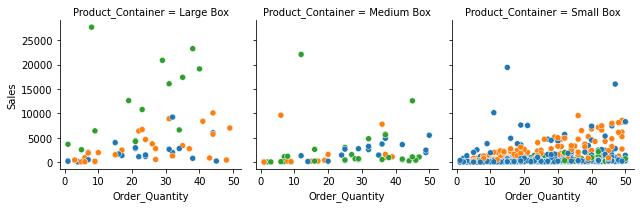

In [17]:
g = sns.FacetGrid(df_data, col="Product_Container")
g.map_dataframe(sns.scatterplot, "Order_Quantity", "Sales", hue = "Product_Category")

## LINE PLOT:


> The Line plot is constructed between Product Category and the  Sales, associated with each category.


1.   As was observed previously, the tech-appliances are most expensive.

2.  Followed by Furniture, and thenm Office supplies respectively.





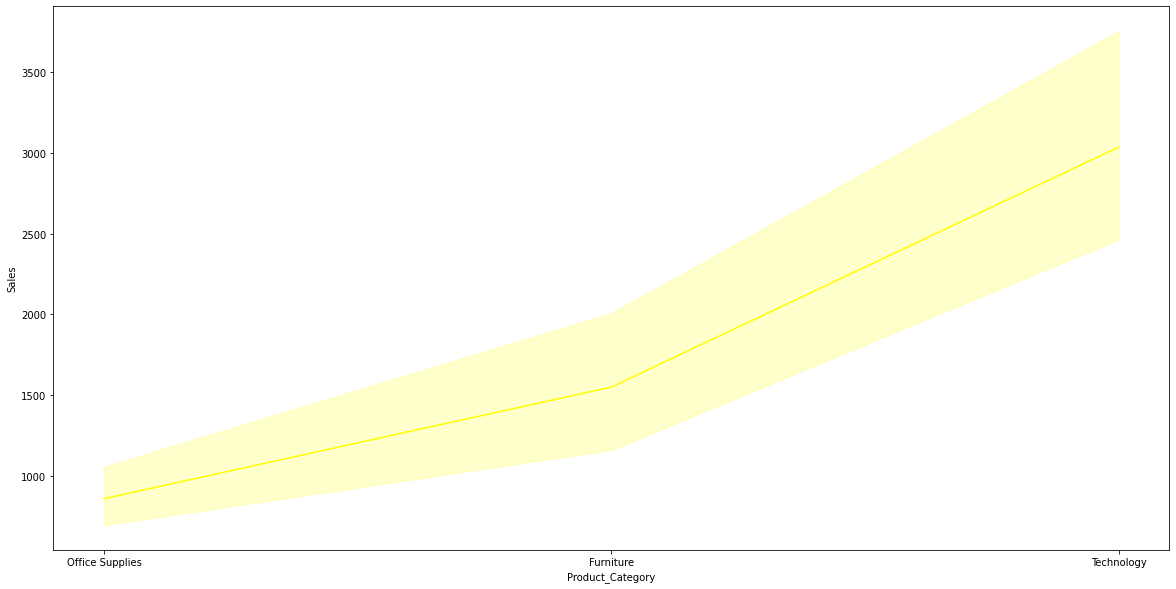

In [23]:
fig, d = plt.subplots(figsize=(20,10))
sns.lineplot(data=df_data, x="Product_Category", y="Sales",ax=d, color = "Yellow")

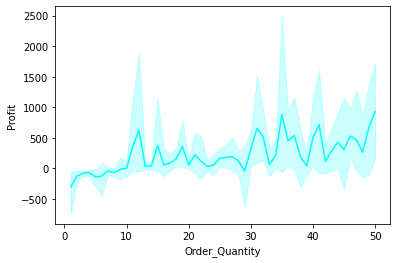

In [36]:
sns.lineplot(data=df_data, x="Order_Quantity", y="Profit", color = 'Cyan')

**In the above plot, it is apparent that the Order Quantity and Profit have a linear relationship; hence, as the Quantity inceases, the store makes more profit.**

### VIOLIN PLOT-


> The Violin Plot is drawn between the mode of Shipment and the respective Profit obtained. 
*INFERENCES-*

1.   The overall shape and distribution is reletively similar for both shipment modes, however, there are more outliers present in the Regular Air mode.

2.   Since the Regular Air mode distribution is wider than Express Air mode, it suggests that the probability of obtaining the values is greater for Regular air mode.





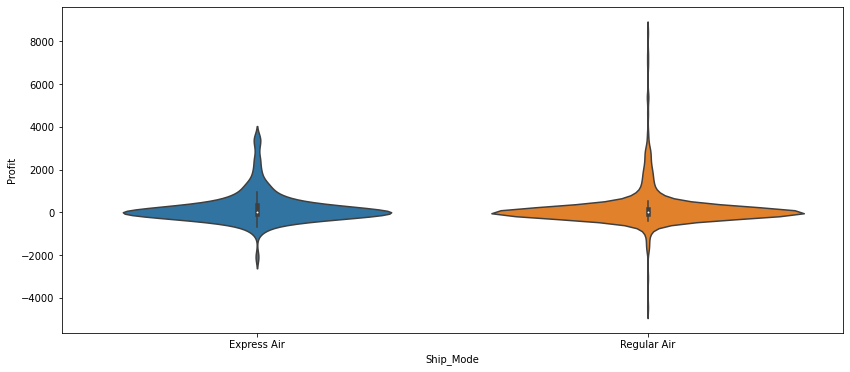

In [32]:
fig, ax = plt.subplots(figsize=(14,6))
sns.violinplot(x="Ship_Mode", y="Profit", data=df_data ,ax=ax)

## PAIR PLOT:

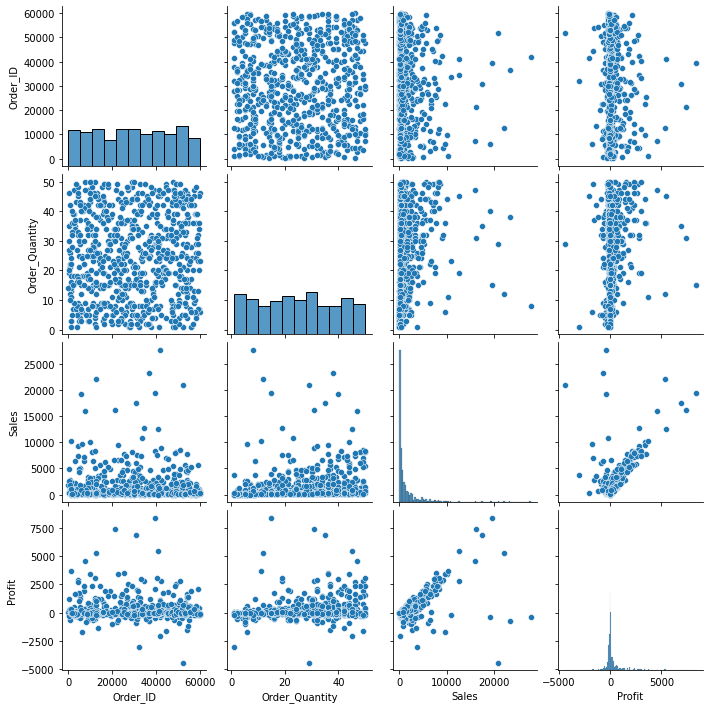

In [42]:
sns.pairplot(df_data)